In [19]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# supressing warning for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [22]:
# reading the data
data = pd.read_csv('Melbourne_housing_FULL.csv')
data.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [5]:
data.shape

(34857, 21)

In [10]:
data.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


In [23]:
# discarding certain attributes
cols_to_use = ['Suburb', 'Rooms','Type','Method','SellerG', 'Regionname','Propertycount','Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Price']
data = data[cols_to_use]
data.head(2)

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0


In [13]:
data.shape

(34857, 15)

In [11]:
data.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [24]:
cols_to_fill_zero = ['Propertycount','Distance','Bedroom2','Bathroom','Car']
data[cols_to_fill_zero] = data[cols_to_fill_zero].fillna(0)
data.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [25]:
# filling Landsize and Building Area with te mean
data['Landsize'] = data['Landsize'].fillna(data.Landsize.mean())
data['BuildingArea'] = data['BuildingArea'].fillna(data.BuildingArea.mean())
data.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [27]:
data.dropna(inplace=True)
data.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [29]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
X = data.drop('Price' ,axis=1)
y = data['Price']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)
mod = LinearRegression().fit(X_train,y_train)

#score on training data
print(mod.score(X_train,y_train))

#score on test data
print(mod.score(X_test, y_test))

0.6827792395792723
0.1385368316164992


# Lasso Regularization(L1)

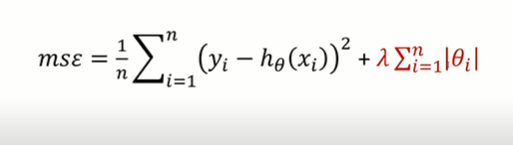

In [48]:
# we can see the model has overfitted the trainig data we can deal with this with the help of regularization
# Lasso regularization(L1)
from sklearn.linear_model import Lasso 
reg = Lasso(alpha = 50, max_iter = 100, tol=0.1)
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.6766985624766824

In [61]:
reg.score(X_test,y_test) # acurracy improved from 13% to 66%

0.6636111369404488

In [ ]:
ar = np.array([10,20,30,40,50])
br = []
for i in ar:
    reg = Lasso(alpha = i, max_iter = 100)
    reg.fit(X_train,y_train)
    br.append(reg.score(X_test,y_test))
import matplotlib.pyplot as plt
plt.plot(ar,br)

# Ridge Regularization(L2)

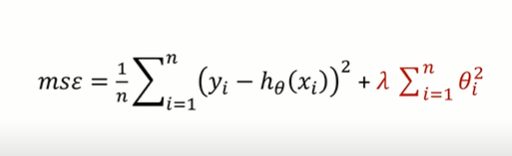

In [59]:
from sklearn.linear_model import Ridge
reg2 = Ridge(alpha = 10, max_iter = 100, tol = 0.1)
reg2.fit(X_train,y_train)
reg2.score(X_train,y_train)

0.6745543770461705

In [60]:
reg2.score(X_test,y_test)

0.674355818733898

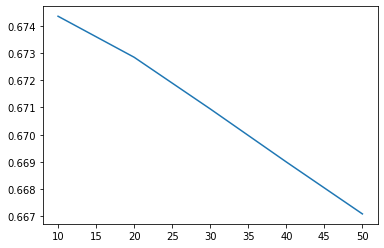

In [58]:
ar = np.array([10,20,30,40,50])
br = []
for i in ar:
    reg2 = Ridge(alpha = i, max_iter = 100)
    reg2.fit(X_train,y_train)
    br.append(reg2.score(X_test,y_test))
import matplotlib.pyplot as plt
plt.plot(ar,br)
    